# 实验一 线性回归与随机梯度下降

## 导入必要模块，加载数据集

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from IPython import display

%matplotlib inline
import matplotlib.pyplot as plt

display.set_matplotlib_formats('svg')

In [2]:
data = load_svmlight_file('housing_scale')
X = data[0].A
y = data[1]
m, n = X.shape
print('There are totally {} samples'.format(m))
print('Every sample has {} features'.format(n))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

There are totally 506 samples
Every sample has 13 features
X.shape: (506, 13)
y.shape: (506,)


In [3]:
# 给所有的样本加上额外的1，方便向量化
X = np.insert(X, 0, values=np.ones((m,)), axis=1)
print(X.shape)

(506, 14)


In [4]:
print(X[:5])
print(y[:5])

[[ 1.        -1.        -0.64      -0.86437   -1.        -0.37037
   0.155011   0.283213  -0.461594  -1.        -0.583969  -0.425532
   1.        -0.82064  ]
 [ 1.        -0.999528  -1.        -0.515396  -1.        -0.654321
   0.0959954  0.565396  -0.302076  -0.913043  -0.790076   0.106383
   1.        -0.59106  ]
 [ 1.        -0.999529  -1.        -0.515396  -1.        -0.654321
   0.388772   0.198764  -0.302076  -0.913043  -0.790076   0.106383
   0.979475  -0.873068 ]
 [ 1.        -0.999414  -1.        -0.8739    -1.        -0.699588
   0.317111  -0.116375  -0.102911  -0.826087  -0.866412   0.297872
   0.988552  -0.933223 ]
 [ 1.        -0.99859   -1.        -0.8739    -1.        -0.699588
   0.37421    0.0566426 -0.102911  -0.826087  -0.866412   0.297872
   1.        -0.801325 ]]
[24.  21.6 34.7 33.4 36.2]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (354, 14)
y_train.shape: (354,)
x_test.shape: (152, 14)
y_test.shape: (152,)


## 模型、损失函数

$$
\begin{split}
J\left(\theta\right) &= \frac{1}{m}\sum^{m}_{i=1}\mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right) \\
 &=\frac{1}{2m}\sum^{m}_{i=1}\left(\hat{y}^{(i)}-y^{(i)}\right)^2
\end{split}
$$

In [7]:
def cost_function(x, y, theta):
    return np.sum((x @ theta - y) ** 2) / (2.0 * x.shape[0])

## 闭式解（正规方程）

$$
\theta = \left(X^{T}X\right)^{-1}X^{T}Y
$$

In [8]:
theta_regular_equation = np.linalg.inv(X.T @ X) @ X.T @ y

In [9]:
theta_regular_equation

array([11.45282132, -4.80487545,  2.32102387,  0.28042053,  1.3433675 ,
       -4.31728859,  9.94184603,  0.03360741, -8.11332937,  3.51956799,
       -3.23166334, -4.47791206,  1.84641332, -9.50861984])

### 计算损失

In [10]:
# 训练集上的损失：
cost_train = cost_function(x_train, y_train, theta_regular_equation)
cost_train

12.627413891330162

In [11]:
# 测试集上的损失:
cost_validation = cost_function(x_test, y_test, theta_regular_equation)
cost_validation

7.034788737298422

## 梯度下降

In [12]:
def gradient_descent(x, y, theta, iterations, lr, x_, y_):
    m = x.shape[0]
    train_costs = list()
    test_costs = list()
    for i in range(iterations):
        theta = theta - lr * (1 / m) * (x.T @ (x @ theta - y))
        train_costs.append(cost_function(x, y, theta))
        test_costs.append(cost_function(x_, y_, theta))
    return theta, train_costs, test_costs

In [13]:
theta = np.zeros((n + 1,))
theta, train_costs, test_costs = gradient_descent(x_train, y_train, theta, 2000, 0.01, x_test, y_test)

In [14]:
theta

array([  8.71443134,  -7.2291892 ,   0.97454983,  -1.47565715,
         1.38313828,  -3.1017588 ,   7.15801576,   0.25306017,
        -6.3140383 ,   2.81658833,  -1.19018526,  -4.37476473,
         1.89444451, -10.67696215])

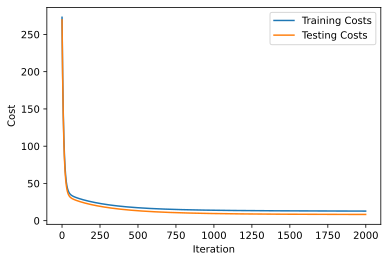

In [15]:
plt.plot(train_costs, label="Training Costs")
plt.plot(test_costs, label='Testing Costs')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

In [17]:
# 训练集上的损失
train_costs[-1]

12.872317165750454

In [18]:
# 验证集上的损失
cost_function(x_test, y_test, theta)

8.363705968657799

### 预测房价

In [19]:
(x_test @ theta).reshape(-1, 1)

array([[28.29463359],
       [20.3840368 ],
       [19.4780014 ],
       [20.5190357 ],
       [35.08509297],
       [17.05855232],
       [27.37371643],
       [25.21898978],
       [22.55597853],
       [38.49452252],
       [18.84639237],
       [14.9917872 ],
       [12.6980093 ],
       [32.90177855],
       [28.21033846],
       [15.08029337],
       [22.19233862],
       [16.50551876],
       [24.81055516],
       [18.80831626],
       [20.92640812],
       [38.21685762],
       [20.50414207],
       [24.96401164],
       [22.44912224],
       [14.82147782],
       [18.55683696],
       [34.22048157],
       [24.28832658],
       [26.17448786],
       [23.8536193 ],
       [23.9551664 ],
       [21.86667265],
       [21.26683868],
       [27.33456968],
       [21.56894619],
       [28.81717694],
       [38.29407744],
       [20.40747494],
       [20.19614989],
       [20.77295654],
       [12.46305919],
       [18.70565866],
       [27.79990915],
       [19.48981949],
       [ 9

## 随机梯度下降

In [20]:
def stochastic_gradient_descent(x, y, theta, epochs, lr, x_, y_):
    m = x.shape[0]
    train_costs = list()
    test_costs = list()
    for epoch in range(epochs):
        index = np.random.choice(m, m, replace=False)
        for i in range(m):
            sample_x, sample_y = x[i], y[i]
            theta -= lr * sample_x * (np.sum(theta * sample_x) - sample_y)
            if (i + 1) % 50 == 0:
                train_costs.append(cost_function(x, y, theta))
                test_costs.append(cost_function(x_, y_, theta))
    
    return theta, train_costs, test_costs

In [57]:
theta = np.zeros((n + 1,))
theta, train_costs, test_costs = stochastic_gradient_descent(x_train, y_train, theta, 50, 0.001, x_test, y_test)

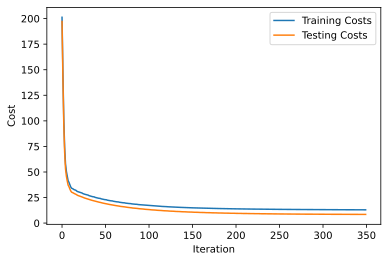

In [58]:
plt.plot(train_costs, label="Training Costs")
plt.plot(test_costs, label='Testing Costs')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

In [59]:
cost_function(x_train, y_train, theta)

12.976251030090983

In [60]:
cost_function(x_test, y_test, theta)

8.480302227345318

In [229]:
(x_test @ theta).reshape(-1, 1)

array([[28.95623895],
       [17.94722422],
       [13.39641799],
       [25.42872816],
       [42.52574441],
       [18.99968374],
       [33.33277928],
       [24.09155048],
       [28.22313445],
       [39.66979432],
       [24.14938385],
       [27.19388683],
       [18.44053309],
       [23.70303567],
       [20.5505082 ],
       [14.36447563],
       [26.58785037],
       [21.79701911],
       [24.93636679],
       [18.69845921],
       [38.88546768],
       [29.70423756],
       [30.84408092],
       [14.99998362],
       [27.58688087],
       [ 9.76457101],
       [15.41631239],
       [24.80148445],
       [17.66275195],
       [22.92566216],
       [33.63091973],
       [27.91682331],
       [25.16830692],
       [23.96242161],
       [21.73792677],
       [24.35922948],
       [41.47094534],
       [21.19283862],
       [30.27264365],
       [24.78965588],
       [25.07798697],
       [20.90329862],
       [24.64885944],
       [18.65744008],
       [22.86960463],
       [20

## sklearn自带api

In [241]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(x_train, y_train[:, np.newaxis])
model.predict(x_test)

array([[28.45389738],
       [16.31665952],
       [12.25831564],
       [24.2694092 ],
       [41.84172734],
       [17.26956634],
       [32.72513383],
       [23.43663644],
       [27.7183784 ],
       [39.79543635],
       [22.25059649],
       [26.05813761],
       [17.13145466],
       [22.88469443],
       [18.68563021],
       [12.87189352],
       [26.15197116],
       [20.67542525],
       [24.29851844],
       [18.02421338],
       [38.54307728],
       [29.50825947],
       [30.36441498],
       [14.29226995],
       [26.74350714],
       [ 9.23710841],
       [14.13353144],
       [23.86311339],
       [16.01248339],
       [22.83687791],
       [32.54297237],
       [27.69066443],
       [24.89254392],
       [23.21316911],
       [20.31699248],
       [23.82131747],
       [41.91521344],
       [20.93586064],
       [29.2133671 ],
       [24.30049975],
       [24.15606335],
       [19.68185796],
       [23.54233106],
       [17.03365108],
       [22.2959707 ],
       [20

参数：

In [242]:
model.coef_

array([[10.4892324 , -5.32006951,  1.90040426,  0.3537583 ,  1.22521658,
        -4.94104778,  8.68432143,  0.32090948, -7.78815678,  3.47804225,
        -3.03482801, -4.46091231,  1.64681479, -9.93159599]])

In [243]:
cost_function(x_train, y_train, model.coef_.reshape(-1))

11.746839619969654

In [215]:
cost_function(x_test, y_test, model.coef_.reshape(-1))

9.349441348017349